In [1241]:
# Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

In [1175]:
import numpy as np

class vehicle:
    def __init__(self, pos, v, direction, turn_p):
        """
        Initializes a vehicle object with its position, velocity, direction, and turning probability.

        Args:
            pos (int): The position of the vehicle on a 1D road.
            v (int): The velocity of the vehicle.
            direction (str): The direction the vehicle is facing, either 'right' or 'left'.
            turn_p (float): The probability of the vehicle making a turn at a given time step.
        """
        self.pos = pos
        self.v = v
        self.direction = direction
        self.turn_p = turn_p

        # Determine whether the vehicle will make a turn at this time step
        self.turn = True if np.random.uniform() < self.turn_p else False

        # Keep track of whether the vehicle has made a turn during the current time step
        self.turn_check = False
    
    def __lt__(self, other):
        """
        Defines the less than operator for vehicle objects based on their velocity.

        Args:
            other (vehicle): Another vehicle object to compare to.

        Returns:
            bool: True if this vehicle's velocity is less than the other vehicle's velocity, False otherwise.
        """
        return self.v < other
    
    def __gt__(self, other):
        """
        Defines the greater than operator for vehicle objects based on their velocity.

        Args:
            other (vehicle): Another vehicle object to compare to.

        Returns:
            bool: True if this vehicle's velocity is greater than the other vehicle's velocity, False otherwise.
        """
        return self.v > other
    
    def __le__(self, other):
        """
        Defines the less than or equal to operator for vehicle objects based on their velocity.

        Args:
            other (vehicle): Another vehicle object to compare to.

        Returns:
            bool: True if this vehicle's velocity is less than or equal to the other vehicle's velocity, False otherwise.
        """
        return self.v <= other
    
    def __ge__(self, other):
        """
        Defines the greater than or equal to operator for vehicle objects based on their velocity.

        Args:
            other (vehicle): Another vehicle object to compare to.

        Returns:
            bool: True if this vehicle's velocity is greater than or equal to the other vehicle's velocity, False otherwise.
        """
        return self.v >= other
    
    def __add__(self, other):
        """
        Defines the addition operator for vehicle objects based on their velocities.

        Args:
            other (int): An integer to add to this vehicle's velocity.

        Returns:
            int: The sum of this vehicle's velocity and the other integer.
        """
        return self.v + other
    
    def __sub__(self, other):
        """
        Defines the subtraction operator for vehicle objects based on their velocities.

        Args:
            other (int): An integer to subtract from this vehicle's velocity.

        Returns:
            int: The difference between this vehicle's velocity and the other integer.
        """
        return self.v - other
    
    def __radd__(self, other):
        """
        Defines the right-hand addition operator for vehicle objects based on their velocities.

        Args:
            other (int): An integer to add to this vehicle's velocity.

        Returns:
            int: The sum of this vehicle's velocity and the other integer.
        """
        return self.v + other
    
    def __rsub__(self, other):
        """
        Defines the right-hand subtraction operator for vehicle objects based on their velocities.

        Args:
            other (int): An integer to subtract this vehicle velocity from.
        Returns:
            int: The difference between the other integer and this vehicle's velocity.
        """
        return other - self.v

def __repr__(self) -> str:
    """
    Returns a string representation of the vehicle object.

    Returns:
        str: A string describing the vehicle's direction.
    """
    return f"{self.direction}"



In [1176]:
class TrafficLights:
    def __init__(self, green_duration, red_duration, position, green):
        """
        Initializes a traffic light object with its green and red light durations, position, and initial light color.

        Args:
            green_duration (int): The number of time steps the green light should be on.
            red_duration (int): The number of time steps the red light should be on.
            position (int): The position of the traffic light on a 1D road.
            green (bool): Whether the traffic light is initially green or red.
        """
        self.green_duration = green_duration
        self.red_duration = red_duration
        self.position = position
        self.time = 0
        self.green = green

    def update(self):
        """
        Updates the traffic light's state based on its current time and light color.

        If the light is green, checks if its duration has been reached and switches to red if so.
        If the light is red, checks if its duration has been reached and switches to green if so.
        Resets the time counter after each color change.
        """
        self.time += 1
        if self.green:
            if self.time == self.green_duration:
                self.green = False
                self.time = 0
        else:
            if self.time == self.red_duration:
                self.green = True
                self.time = 0


In [1220]:
from matplotlib import colors


class TrafficSimulation:
    def __init__(self, grid_size=40, green_light=30, red_light=15, turn_prob=0.4, 
                 prob_slow=0.2, max_speed=5, 
                 gen_rate={'NS': 0.2, 'SN': 0.3, 'EW': 0.7, 'WE': 0.8}, plot_on=True):
        """
        Initializes a new traffic simulation with the specified parameters.
        
        grid_size: integer, size of the square grid for the simulation
        green_light: integer, duration of green traffic light
        red_light: integer, duration of red traffic light
        turn_prob: float, probability of cars turning
        prob_slow: float, probability of cars slowing down
        max_speed: integer, maximum speed of cars
        gen_rate: dictionary, specifies the rate of car generation for each road
        plot_on: boolean, whether to display a plot of the simulation
        """
        self.grid_size = grid_size
        self.green_light = green_light
        self.red_light = red_light
        self.turn_prob = turn_prob
        self.prob_slow = prob_slow
        self.max_speed = max_speed
        self.gen_rate = gen_rate
        self.green_on = True
        self.middle = self.grid_size // 2
        self.average_speed = {'NS': [], 'SN': [], 'EW': [], 'WE': []}
        self.average_car_density = {'NS': [], 'SN': [], 'EW': [], 'WE': []}
        self.average_flow = {'NS': [], 'SN': [], 'EW': [], 'WE': []}
        self.plot_on = plot_on


    def initialize(self):
        """
        Initializes the grid and sets the traffic lights, roads, and velocity grid.
        """
        self.grid = np.full((self.grid_size, self.grid_size), -1, dtype=object)
        self.time = 0
        self.traffic_lights = {'NS': TrafficLights(self.red_light, self.green_light, [self.middle - 1, self.middle - 1], green=False),
                                'SN': TrafficLights(self.red_light, self.green_light, [self.middle, self.middle], green=False),
                                'EW': TrafficLights(self.green_light, self.red_light, [self.middle - 1, self.middle], green=True),
                                'WE': TrafficLights(self.green_light, self.red_light, [self.middle, self.middle - 1], green=True)}
        self.roads = {'NS': [[i, self.middle - 1] for i in range(self.grid_size)],
                        'SN': [[i, self.middle] for i in range(self.grid_size)],
                        'WE': [[self.middle, i] for i in range(self.grid_size)],
                        'EW': [[self.middle - 1, i] for i in range(self.grid_size)]}
        self.velocity_grid = np.full((self.grid_size, self.grid_size), -1)
        self.generate_cars()
        if self.plot_on:
            self.figure, self.axes = plt.subplots()
            # cmap = colors.ListedColormap(['grey', 'red', 'orangered', 'orange', 'yellow', 'yellowgreen', 'green'])
            # bounds = [-1, 0, 1, 2, 3, 4, 5, 6]
            # norm = colors.BoundaryNorm(bounds, cmap.N)
            # cbar = self.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=self.axes, ticks=)
        
    def generate_cars(self):
        """
        Generates cars on the grid according to the specified generation rates.
        """
        for road in self.roads:
            if np.random.uniform() < self.gen_rate[road]:
                current_road = self.roads[road]
                if road == 'NS':
                    self.grid[current_road[0][0], current_road[0][1]] = vehicle(pos=self.roads[road][0], v=0, direction='NS', turn_p =self.turn_prob)
                elif road == 'SN':
                    self.grid[current_road[-1][0], current_road[-1][1]] = vehicle(pos=self.roads[road][-1], v=0, direction='SN', turn_p=self.turn_prob)
                elif road == 'WE':
                    self.grid[current_road[0][0], current_road[0][1]] = vehicle(pos=self.roads[road][0], v=0, direction='WE', turn_p=self.turn_prob)
                elif road == 'EW':
                    self.grid[current_road[-1][0], current_road[-1][1]] = vehicle(pos=self.roads[road][-1], v=0, direction='EW', turn_p=self.turn_prob)
        
    
    def movement(self, direction, i, j, looking_in, traffic_light_info, turning_direction, turning_coords, end_of_road, car, after_turn_coords= None):
        """
        Updates the position and velocity of a car based on its surroundings and traffic rules.

        Args:
        - direction: tuple, the direction the car is currently facing
        - i: int, the row index of the current position of the car in the grid
        - j: int, the column index of the current position of the car in the grid
        - looking_in: tuple, the indices of the cell the car is currently looking at
        - traffic_light_info: TrafficLight, an object containing information about the traffic light at the current position
        - turning_direction: tuple, the direction the car will be facing after making a turn
        - turning_coords: tuple, the coordinates of the cell where the car will make a turn
        - end_of_road: tuple, the coordinates of the last cell in the road
        - car: Car, the car to update
        - after_turn_coords: tuple, the coordinates of the cell where the car will be after making a turn

        Returns: None
        """
def movement(self, direction, i, j, looking_in, traffic_light_info, turning_direction, turning_coords, end_of_road, car, after_turn_coords=None):
    """
    Updates the position and velocity of a car based on its surroundings and traffic rules.

    Args:
    - direction: tuple, the direction the car is currently facing
    - i: int, the row index of the current position of the car in the grid
    - j: int, the column index of the current position of the car in the grid
    - looking_in: tuple, the indices of the cell the car is currently looking at
    - traffic_light_info: TrafficLight, an object containing information about the traffic light at the current position
    - turning_direction: tuple, the direction the car will be facing after making a turn
    - turning_coords: tuple, the coordinates of the cell where the car will make a turn
    - end_of_road: tuple, the coordinates of the last cell in the road
    - car: Car, the car to update
    - after_turn_coords: tuple, the coordinates of the cell where the car will be after making a turn

    Returns: None
    """
    # Calculate the distance to the traffic light
    distance_to_light = np.abs(np.sum([traffic_light_info.position[0] - i, traffic_light_info.position[1] - j]))
    
    # Handle turning
    if car.turn and not car.turn_check and traffic_light_info.green and car.pos == turning_coords:
        # Slow down and turn
        car.v = 1
        car.direction = turning_direction
        car.turn_check = True
        car.pos = after_turn_coords
        return None
    elif car.turn and not car.turn_check and traffic_light_info.green and car.pos != after_turn_coords:
        # Keep driving straight until the turn is reached
        if car.v < self.max_speed:
            car.v += 1
        if car.v >= distance_to_light:
            car.v = distance_to_light - 1
        return None
        
    # No car in lane
    if len(looking_in) == 0:
        # Traffic light red
        if traffic_light_info.green is False:
            # Slow down if the car is approaching the traffic light
            if car.v < self.max_speed:
                car.v += 1
            if car.v >= distance_to_light:
                car.v = distance_to_light - 1
        else: # Traffic light green
            # Accelerate if the car is not at maximum speed
            car.v = min(car.v + 1, self.max_speed)
            
    # Car in lane and traffic light red
    elif traffic_light_info.green is False:
        distance_to_next_car = np.abs(np.sum([looking_in[0] - i, looking_in[1] - j]))
        shorter_distance = min(distance_to_next_car, distance_to_light)
        # Slow down if the car is approaching the next car or the traffic light
        if car.v < self.max_speed:
            car.v += 1
        if car.v >= shorter_distance and shorter_distance > 0:
            car.v = shorter_distance - 1
        else:# Car in lane and traffic light green
            distance_to_next_car = np.abs(np.sum([looking_in[0] - i, looking_in[1] - j]))
            # Slow down if the car is approaching the next car
            if car.v < self.max_speed:
                car.v += 1
            if car.v >= distance_to_next_car:
                car.v = distance_to_next_car - 1
        if np.random.uniform() < self.prob_slow and car.v > 1:
            car.v -= 1
                

    def update(self):
        """Updates the state of the simulation by one time step"""
        
        # Generate new cars
        self.generate_cars()
        
        # Update traffic light states
        for i in self.traffic_lights:
            self.traffic_lights[i].update()
        
        # Create a new grid to update car positions on
        grid_new = np.full((self.grid_size, self.grid_size), -1, dtype=object)
        
        # Update each car on the current grid
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                car = self.grid[i,j]
                
                # If there is a car at the current grid position
                if car != -1:
                    # Update the car's position based on its direction
                    if car.direction == 'NS':
                        looking_in = [i for i in self.roads['NS'] if i[0] > car.pos[0] and self.grid[i[0],i[1]] != -1]
                        if len(looking_in) > 0:
                            looking_in = looking_in[0]
                        # Get all the requried information for the movement function
                        traffic_light_NS = self.traffic_lights['NS']
                        turning_direction = 'EW'
                        turning_coords = [self.traffic_lights['NS'].position[0] - 1, self.traffic_lights['NS'].position[1]]
                        end_coords = self.roads['NS'][-1]
                        after_turning_coords = [self.middle- 1, self.middle - 2]

                        self.movement('NS', i, j, looking_in, traffic_light_NS, turning_direction, turning_coords, end_coords, car, after_turning_coords)
                        if car.turn_check is False:
                            car.pos = [i+car.v, j] 
                        car.turn_check = False
                        if car.pos[0] >= self.grid_size-1:
                            # Remoce car from grid if it has reached the end of the road
                            if car.pos == end_coords:
                                grid_new[car.pos[0],car.pos[1]] = -1
                            else:
                                car.pos = None
                                car.v = None
                                car.direction = None
                                car.turn = None
                                car.turn_check = None
                                car = None
                        else:
                            # Update lane position on new grid
                            grid_new[car.pos[0], car.pos[1]] = car
                            continue
                    elif car.direction == 'SN':
                        looking_in = [i for i in self.roads['SN'] if i[0] < car.pos[0] and self.grid[i[0],i[1]] != -1]
                        if len(looking_in) > 0:
                            looking_in = looking_in[-1]
                        # Get all the required information for the car's movement
                        traffic_light_SN = self.traffic_lights['SN']
                        turning_direction = 'WE'
                        turning_coords = [self.traffic_lights['SN'].position[0] + 1, self.traffic_lights['SN'].position[1]]
                        end_coords = self.roads['SN'][0]
                        after_turning_coords = [self.middle, self.middle + 1]
                        self.movement('SN', i, j, looking_in, traffic_light_SN, turning_direction, turning_coords, end_coords, car, after_turning_coords)
                        if car.turn_check is False:
                            car.pos = [i-car.v, j]
                        car.turn_check = False
                        # Remove car from grid if it has reached the end of the road
                        if car.pos[0] <= 0:
                            if car.pos == end_coords:
                                grid_new[car.pos[0],car.pos[1]] = -1
                            else:
                                car.pos = None
                                car.v = None
                                car.direction = None
                                car.turn = None
                                car.turn_check = None
                                car = None
                        else:
                        # lane update to new grid
                            grid_new[car.pos[0],car.pos[1]] = car
                            continue

                    elif car.direction == 'WE':
                        looking_in = [i for i in self.roads['WE'] if i[1] > car.pos[1] and self.grid[i[0], i[1]] != -1]
                        if len(looking_in) > 0:
                            looking_in = looking_in[0]
                        # Get all the relevant information for the car's movement
                        traffic_light_WE = self.traffic_lights['WE']
                        turning_direction = 'NS'
                        turning_coords = [self.traffic_lights['WE'].position[0], self.traffic_lights['WE'].position[1]-1]
                        end_coords = self.roads['WE'][-1]
                        after_turning_coords = [self.middle + 1, self.middle - 1]
                        self.movement('WE', i, j, looking_in, traffic_light_WE, turning_direction, turning_coords, end_coords, car, after_turning_coords)
                        if car.turn_check is False:
                            car.pos = [i, j+car.v]
                        car.turn_check = False
                        # Remove car from grid if it has reached the end of the road
                        if car.pos[1] >= self.grid_size-1:
                            if car.pos == end_coords:
                                grid_new[car.pos[0], car.pos[1]] = -1
                            else:
                                car.pos = None
                                car.v = None
                                car.direction = None
                                car.turn = None
                                car.turn_check = None
                                car = None
                        else:
                        # lane update to new grid
                            grid_new[car.pos[0], car.pos[1]] = car
                            continue
                    elif car.direction == 'EW':
                        looking_in = [i for i in self.roads['EW'] if i[1] < car.pos[1] and self.grid[i[0], i[1]] != -1]
                        if len(looking_in) > 0:
                            looking_in = looking_in[-1]
                        # Get all the requried information for the movement function
                        traffic_light_EW = self.traffic_lights['EW']
                        turning_direction = 'SN'
                        turning_coords = [self.traffic_lights['EW'].position[0], self.traffic_lights['EW'].position[1]+1]
                        end_coords = self.roads['EW'][0]
                        after_turning_coords = [self.middle - 2, self.middle]
                        self.movement('EW', i, j, looking_in, traffic_light_EW, turning_direction, turning_coords, end_coords, car, after_turning_coords)
                        if car.turn_check is False:
                            car.pos = [i, j-car.v]
                        car.turn_check = False
                        # Remove car from grid if it has reached the end of the road
                        if car.pos[1] <= 0:
                            if car.pos == end_coords:
                                grid_new[car.pos[0], car.pos[1]] = -1
                            else:
                                car.pos = None
                                car.v = None
                                car.direction = None
                                car.turn = None
                                car.turn_check = None
                                car = None
                        else:
                        # lane update to new grid
                            grid_new[car.pos[0], car.pos[1]] = car
                            continue
        # Update Grid
        self.grid = grid_new
        self.time += 1
        # Update the average speed, car density and flow
        self.average_speed_method()
        self.average_car_density_method()
        self.average_flow_method()
    
    def average_speed_method(self):
        for road in self.roads:
            velocity_list = []
            for i in self.roads[road]:
                if isinstance(self.grid[i[0], i[1]], vehicle) and self.grid[i[0], i[1]].direction == road:
                    velocity_list.append(self.grid[i[0], i[1]].v)
            if sum(velocity_list) == 0:
                self.average_speed[road].append(0)
            else:
                self.average_speed[road].append(sum(velocity_list)/len(velocity_list))

    def average_car_density_method(self):
        for road in self.roads:
            density_list = []
            for i in self.roads[road]:
                if isinstance(self.grid[i[0], i[1]], vehicle) and self.grid[i[0], i[1]].direction == road:
                    density_list.append(1)
            self.average_car_density[road].append(sum(density_list)/self.grid_size)

    def average_flow_method(self):
        for road in self.roads:
            self.average_flow[road].append(self.average_speed[road][-1] * self.average_car_density[road][-1])


    def final(self):
        final_average_speed = {}
        final_average_car_density = {}
        final_average_flow = {}

        for key, value in self.average_speed.items():
            # Compute the average of the values in the list
            if sum(value) == 0:
                average_value = 0
            else:
                average_value = sum(value) / len(value)
            final_average_speed[key] = average_value
        
        for key, value in self.average_car_density.items():
            # Compute the average of the values in the list
            if sum(value) == 0:
                average_value = 0
            else:
                average_value = sum(value) / len(value)
            final_average_car_density[key] = average_value

        for key, value in self.average_flow.items():
            # Compute the average of the values in the list
            if sum(value) == 0:
                average_value = 0
            else:
                average_value = sum(value) / len(value)
            final_average_flow[key] = average_value
        return final_average_speed, final_average_car_density, final_average_flow

    def grid_setup(self):
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if isinstance(self.grid[i, j], vehicle) and self.grid[i, j].v != None:
                    self.velocity_grid[i,j] = self.grid[i,j].v
                else:
                    self.velocity_grid[i,j] = -1

    def observe(self):
        self.grid_setup()
        cmap = colors.ListedColormap(['grey', 'red', 'orangered', 'orange', 'yellow', 'yellowgreen', 'green'])
        bounds = [-1, 0, 1, 2, 3, 4, 5, 6]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        plot = self.axes.imshow(
            self.velocity_grid, cmap=cmap, norm=norm, animated=True)
        self.axes.set_title(f'State at step {self.time}')
        self.axes.grid(which='minor', color='k', linestyle='-',
        linewidth=1)
        return plot



In [1180]:
import matplotlib.pyplot as plt
import numpy as np

def make_animation(sim, total_frames, steps_per_frame=1, interval=100):
    from matplotlib.animation import FuncAnimation
    from IPython.display import HTML
    from tqdm import tqdm
    
    def update(frame_number):
        for _ in range(steps_per_frame):
            sim.update()
        progress_bar.update(1)
        return [sim.observe()]

    sim.initialize()
    progress_bar = tqdm(total=total_frames)
    animation = FuncAnimation(
        sim.figure, update, init_func=lambda: [], frames=total_frames, interval=interval)
    output = HTML(animation.to_jshtml())
    sim.figure.clf()
    return output

In [1240]:
ts = TrafficSimulation()
make_animation(ts, total_frames=60, steps_per_frame=1)

100%|██████████| 60/60 [00:34<00:00,  1.76it/s]


<Figure size 640x480 with 0 Axes>

### Theoretical Analysis

In [1210]:
def mfa(v, density, p_slow):
    '''
    Calculate the updated distribution over speeds given the current
    distribution by applying the MFA traffic rules.

    Inputs:
    
        v (list of float) The car speed probability vector. v[i] is the
        probability that a car is moving at speed i.

        density (float) The average number of cars per cell on the road.
        
        p_slow (float) The probability of random slow-down.
    
    Returns: A new, updated car speed probability vector.
    '''
    v_max = len(v) - 1
    new_v = [0] * len(v)  # The updated speed probability vector
    for v_from in range(v_max + 1):
        
        # Current speed, will be updated below
        speed = v_from
        
        # Accelerate
        if speed < v_max:
            speed += 1
        
        # Brake when there is a car in front at each distance from 1 to speed
        for distance in range(1, speed + 1):
            # Probability that a car is in front at a particular distance
            car_at_distance = (1-density)**(distance-1) * density
            if distance > 1:
                new_v[distance-1] += v[v_from] * car_at_distance * (1-p_slow)
                new_v[distance-2] += v[v_from] * car_at_distance * p_slow
            else:
                new_v[distance-1] += v[v_from] * car_at_distance
        
        # No cars in front up to distance == speed
        new_v[speed] += v[v_from] * (1-density)**speed * (1-p_slow)
        new_v[speed-1] += v[v_from] * (1-density)**speed * p_slow
        
    return new_v

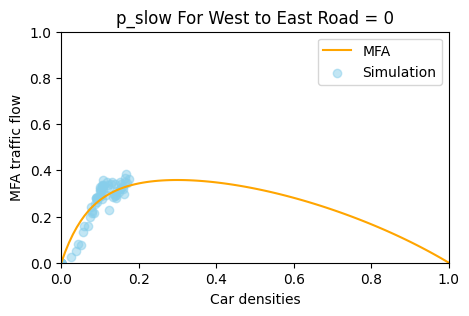

In [1226]:
def average_speed(v):
    return np.sum(np.array(v) * np.arange(len(v)))

def average_flow(v, density):
    return density * average_speed(v)

max_speed = 5
p_slows = [0, 0.25, 0.5]
car_densities = np.linspace(0, 1, 101)

mfa_flow_results = {}  # map from p_slow to flow results for all densities

for p_slow in p_slows:
    mfa_flow_results[p_slow] = []
    for density in car_densities:
        # Start from a uniform distribution over speeds
        v = [1/(max_speed + 1)] * (max_speed + 1)
        assert abs(sum(v) - 1) < 1e-6  # Sanity check before
        for i in range(100):  # Run until convergence
            v = mfa(v, density, p_slow)
            assert abs(sum(v) - 1) < 1e-6  # Sanity check after
        mfa_flow_results[p_slow].append(average_flow(v, density))
trials = 100
steps = 60
avg_densities = []
avg_flows = []
for i in range(trials):
    ts = TrafficSimulation(prob_slow=0, plot_on=False)
    ts.initialize()
    for steps in range(steps):
        ts.update()
    _, final_density, final_flow = ts.final()
    avg_densities.append(final_density['WE'])
    avg_flows.append(final_flow['WE'])
plt.figure(figsize=(5, 3))
plt.title(f'p_slow For West to East Road = {0}')
plt.plot(car_densities, mfa_flow_results[0], '-', label='MFA', color= 'orange')
plt.scatter(avg_densities, avg_flows, label='Simulation', color='skyblue', alpha=0.5)
plt.xlabel('Car densities')
plt.ylabel('MFA traffic flow')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()
print('\n')

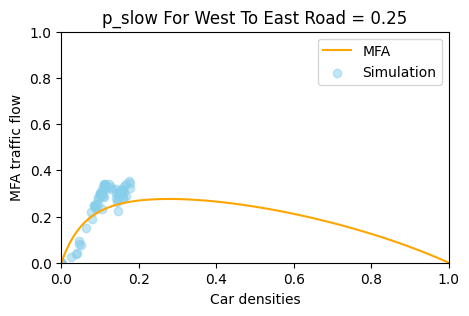

In [1229]:
def average_speed(v):
    return np.sum(np.array(v) * np.arange(len(v)))

def average_flow(v, density):
    return density * average_speed(v)

max_speed = 5
p_slows = [0, 0.25, 0.5]
car_densities = np.linspace(0, 1, 101)

mfa_flow_results = {}  # map from p_slow to flow results for all densities

for p_slow in p_slows:
    mfa_flow_results[p_slow] = []
    for density in car_densities:
        # Start from a uniform distribution over speeds
        v = [1/(max_speed + 1)] * (max_speed + 1)
        assert abs(sum(v) - 1) < 1e-6  # Sanity check before
        for i in range(100):  # Run until convergence
            v = mfa(v, density, p_slow)
            assert abs(sum(v) - 1) < 1e-6  # Sanity check after
        mfa_flow_results[p_slow].append(average_flow(v, density))
trials = 100
steps = 60
avg_densities = []
avg_flows = []
for i in range(trials):
    ts = TrafficSimulation(prob_slow=0.25, plot_on=False)
    ts.initialize()
    for steps in range(steps):
        ts.update()
    _, final_density, final_flow = ts.final()
    avg_densities.append(final_density['WE'])
    avg_flows.append(final_flow['WE'])
plt.figure(figsize=(5, 3))
plt.title(f'p_slow For West To East Road = {0.25}')
plt.plot(car_densities, mfa_flow_results[0.25], '-', label='MFA', color= 'orange')
plt.scatter(avg_densities, avg_flows, label='Simulation', color='skyblue', alpha=0.5)
plt.xlabel('Car densities')
plt.ylabel('MFA traffic flow')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()
print('\n')

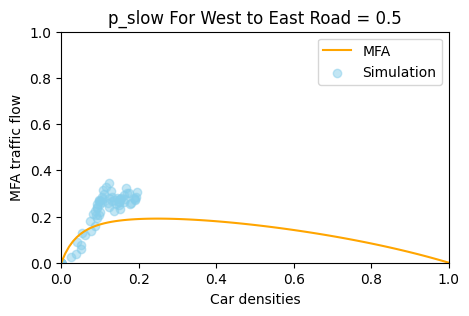

In [1230]:
def average_speed(v):
    return np.sum(np.array(v) * np.arange(len(v)))

def average_flow(v, density):
    return density * average_speed(v)

max_speed = 5
p_slows = [0, 0.25, 0.5]
car_densities = np.linspace(0, 1, 101)

mfa_flow_results = {}  # map from p_slow to flow results for all densities

for p_slow in p_slows:
    mfa_flow_results[p_slow] = []
    for density in car_densities:
        # Start from a uniform distribution over speeds
        v = [1/(max_speed + 1)] * (max_speed + 1)
        assert abs(sum(v) - 1) < 1e-6  # Sanity check before
        for i in range(100):  # Run until convergence
            v = mfa(v, density, p_slow)
            assert abs(sum(v) - 1) < 1e-6  # Sanity check after
        mfa_flow_results[p_slow].append(average_flow(v, density))
trials = 100
steps = 60
avg_densities = []
avg_flows = []
for i in range(trials):
    ts = TrafficSimulation(prob_slow=0.5, plot_on=False)
    ts.initialize()
    for steps in range(steps):
        ts.update()
    _, final_density, final_flow = ts.final()
    avg_densities.append(final_density['WE'])
    avg_flows.append(final_flow['WE'])
plt.figure(figsize=(5, 3))
plt.title(f'p_slow For West to East Road = {0.5}')
plt.plot(car_densities, mfa_flow_results[0.5], '-', label='MFA', color= 'orange')
plt.scatter(avg_densities, avg_flows, label='Simulation', color='skyblue', alpha=0.5)
plt.xlabel('Car densities')
plt.ylabel('MFA traffic flow')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()
print('\n')

### Emperical Analysis

Original Strategy: 0.2497645833333333 +/- [0.24289018818641636, 0.2566389784802502]


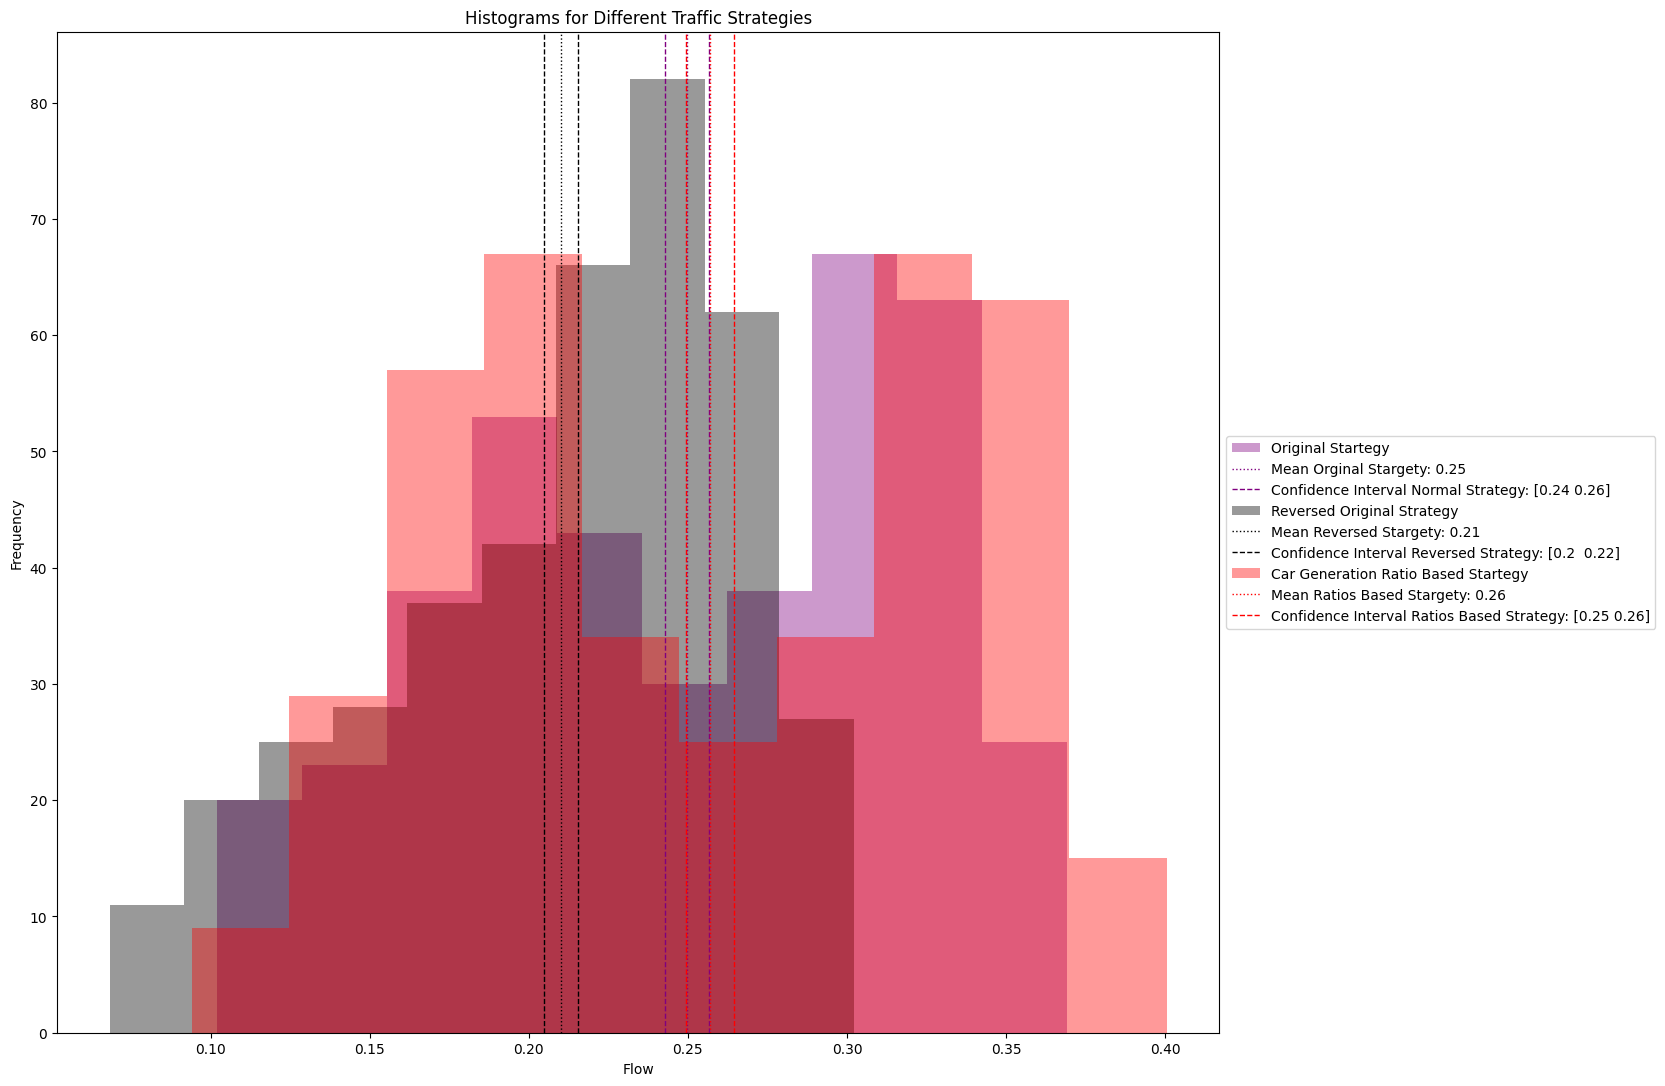

In [1239]:
traffic_lights = {'strat_1':[30, 15], 
                  'strat_2':[15, 30], 
                  'strat_3':[30, 10]}

trials = 100
steps = 60
normal_strat= []
reversed_strat = []
ratios_based_strat = []

for trial in range(trials):
    for key, val in traffic_lights.items():
        ts = TrafficSimulation(green_light=val[0], red_light=val[1], plot_on=False)
        ts.initialize()
        for steps in range(60):
            ts.update()
        _, final_density, final_flow = ts.final()
        if key == 'strat_1':
            normal_strat.append(final_flow['WE'])
            normal_strat.append(final_flow['EW'])
            normal_strat.append(final_flow['NS'])
            normal_strat.append(final_flow['SN'])
        elif key == 'strat_2':
            reversed_strat.append(final_flow['WE'])
            reversed_strat.append(final_flow['EW'])
            reversed_strat.append(final_flow['NS'])
            reversed_strat.append(final_flow['SN'])
        else:
            ratios_based_strat.append(final_flow['WE'])
            ratios_based_strat.append(final_flow['EW'])
            ratios_based_strat.append(final_flow['NS'])
            ratios_based_strat.append(final_flow['SN'])

mean_normal_strat = np.mean(normal_strat)
mean_reversed_strat = np.mean(reversed_strat)
mean_ratios_based_strat = np.mean(ratios_based_strat)
conf_normal_strat = [mean_normal_strat - 1.96 * np.std(normal_strat) / np.sqrt(len(normal_strat)), mean_normal_strat + 1.96 * np.std(normal_strat) / np.sqrt(len(normal_strat))]
conf_reversed_strat = [mean_reversed_strat - 1.96 * np.std(reversed_strat) / np.sqrt(len(reversed_strat)), mean_reversed_strat + 1.96 * np.std(reversed_strat) / np.sqrt(len(reversed_strat))]
conf_ratios_based_strat = [mean_ratios_based_strat - 1.96 * np.std(ratios_based_strat) / np.sqrt(len(ratios_based_strat)), mean_ratios_based_strat + 1.96 * np.std(ratios_based_strat) / np.sqrt(len(ratios_based_strat))]

print(f'Original Strategy: {mean_normal_strat} +/- {conf_normal_strat}')
plt.figure(figsize=(15, 13))
plt.title(f'Histograms for Different Traffic Strategies')
plt.hist(normal_strat, label='Original Startegy', color='purple', alpha=0.4)
plt.axvline(mean_normal_strat, color='purple', linestyle=':', linewidth=1, label=f'Mean Orginal Stargety: {round(mean_normal_strat, 2)}')
plt.axvline(conf_normal_strat[0], color='purple', linestyle='dashed', linewidth=1, label=f'Confidence Interval Normal Strategy: {np.round(conf_normal_strat, 2)}')
plt.axvline(conf_normal_strat[1], color='purple', linestyle='dashed', linewidth=1)

plt.hist(reversed_strat, label='Reversed Original Strategy', color='black', alpha=0.4)
plt.axvline(mean_reversed_strat, color='black', linestyle=':', linewidth=1, label=f'Mean Reversed Stargety: {round(mean_reversed_strat, 2)}')
plt.axvline(conf_reversed_strat[0], color='black', linestyle='dashed', linewidth=1, label=f'Confidence Interval Reversed Strategy: {np.round(conf_reversed_strat, 2)}')
plt.axvline(conf_reversed_strat[1], color='black', linestyle='dashed', linewidth=1)

plt.hist(ratios_based_strat, label='Car Generation Ratio Based Startegy', color='red', alpha=0.4)
plt.axvline(mean_ratios_based_strat, color='red', linestyle=':', linewidth=1, label=f'Mean Ratios Based Stargety: {round(mean_ratios_based_strat, 2)}')
plt.axvline(conf_ratios_based_strat[0], color='red', linestyle='dashed', linewidth=1, label=f'Confidence Interval Ratios Based Strategy: {np.round(conf_ratios_based_strat, 2)}')
plt.axvline(conf_ratios_based_strat[1], color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Flow')
plt.ylabel('Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()